In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

from heapq import nlargest

def set_theme():
    sns.set_theme(
        context="paper",
        style="whitegrid",
        font_scale=1.5,
        font="STIXGeneral",
        rc={
            "text.usetex": True,
        },
    )
    return {"dpi": 300}

save_args = set_theme()

In [ ]:
import networkx as nx

G = nx.read_gexf('./graph.gexf')
print(nx.info(G))

In [2]:
# We are only interested in the largest connected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
print(nx.info(G0))

/tmp/ipykernel_226616/2359333241.py:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G0))


Graph with 43665 nodes and 420662 edges


In [3]:
# diameter
# print(nx.diameter(G0))
# takes too long to compute, instead we use an approximation
nx.approximation.diameter(G0)

20

In [4]:
# transitivity
print("Transitivity:", nx.transitivity(G0))

Transitivity: 0.36865392901613264


In [215]:
nx.degree_histogram(G0)

[0,
 2341,
 3182,
 3321,
 2865,
 2627,
 2300,
 2033,
 1753,
 1589,
 1369,
 1339,
 1197,
 1042,
 939,
 830,
 718,
 725,
 726,
 556,
 556,
 517,
 463,
 438,
 431,
 392,
 402,
 340,
 317,
 309,
 359,
 266,
 279,
 263,
 258,
 244,
 203,
 210,
 207,
 192,
 193,
 177,
 154,
 139,
 171,
 128,
 159,
 159,
 128,
 123,
 122,
 115,
 89,
 116,
 99,
 92,
 105,
 89,
 101,
 90,
 89,
 86,
 83,
 77,
 62,
 73,
 72,
 82,
 60,
 56,
 45,
 61,
 50,
 55,
 50,
 53,
 61,
 51,
 54,
 45,
 53,
 43,
 35,
 25,
 25,
 35,
 31,
 28,
 32,
 39,
 40,
 27,
 39,
 34,
 32,
 37,
 36,
 25,
 31,
 35,
 22,
 23,
 24,
 6,
 15,
 32,
 12,
 22,
 18,
 21,
 27,
 20,
 25,
 24,
 16,
 16,
 15,
 7,
 15,
 10,
 16,
 24,
 16,
 18,
 16,
 15,
 15,
 8,
 9,
 25,
 6,
 12,
 18,
 11,
 11,
 11,
 13,
 8,
 8,
 15,
 3,
 5,
 9,
 8,
 5,
 7,
 9,
 6,
 1,
 4,
 8,
 9,
 7,
 3,
 5,
 10,
 6,
 12,
 5,
 11,
 9,
 9,
 4,
 5,
 8,
 5,
 5,
 5,
 3,
 4,
 1,
 5,
 5,
 3,
 1,
 6,
 4,
 5,
 2,
 5,
 2,
 7,
 5,
 0,
 7,
 3,
 6,
 5,
 0,
 3,
 0,
 0,
 4,
 6,
 4,
 3,
 4,
 4,
 3,
 4

In [33]:
degree_sequence = sorted([d for n, d in G0.degree()], reverse=True)

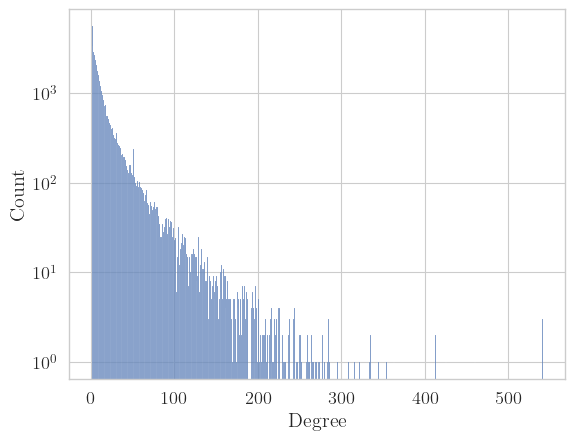

In [38]:
sns.histplot(degree_sequence, log_scale=(False, True))
plt.xlabel("Degree")
plt.savefig('figures/degree_distribution_log.png', **save_args)

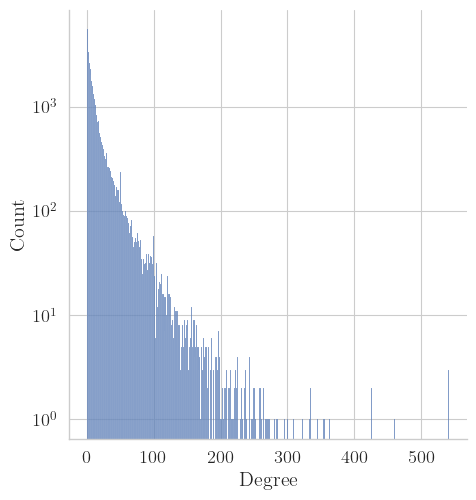

In [43]:
sns.displot(degree_sequence, log_scale=(False, True))
plt.xlabel("Degree")
plt.savefig('figures/degree_distribution.png', **save_args)

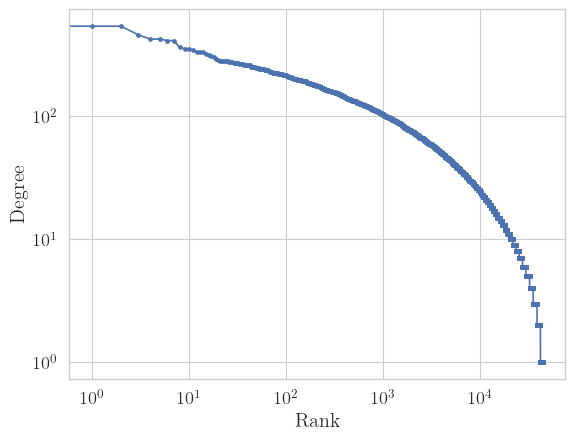

In [36]:
plt.loglog(degree_sequence, marker='.')
plt.ylabel("Degree")
plt.xlabel("Rank")
plt.savefig('figures/degree_rank.png', **save_args)

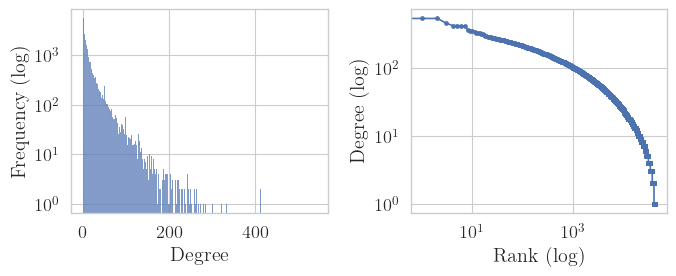

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(7,3))
sns.histplot( degree_sequence, ax=axes[0], log_scale=(False, True))
plt.loglog(degree_sequence, marker='.')
axes[1].set_ylabel("Degree (log)")
axes[1].set_xlabel("Rank (log)")

axes[0].set_xlabel("Degree")
axes[0].set_ylabel("Frequency (log)")
plt.tight_layout()

plt.savefig("figures/degree_joint.png", **save_args)

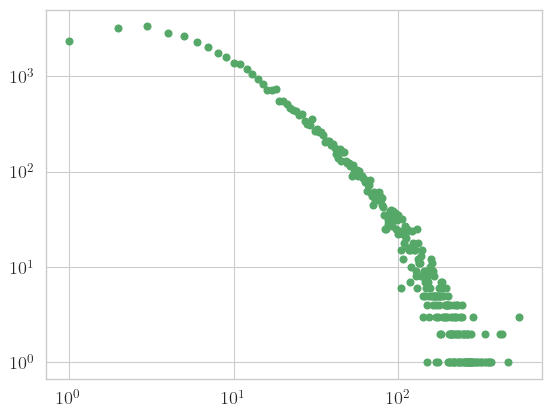

In [217]:
from scipy.optimize import curve_fit
import numpy as np

degree_freq = nx.degree_histogram(G0)
x = np.flatnonzero(degree_freq)
y = np.array(degree_freq)[x]
plt.loglog(x, y, 'go')

ylog = np.log(y)

In [218]:
def func(x, a, g):
    return a*x**(-g)

popt, pcov = curve_fit(func, x, y)

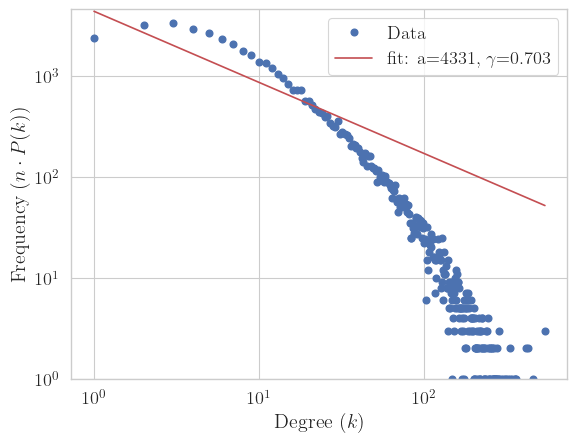

In [220]:
plt.plot(x, y, "o", label="Data")
plt.plot(x, func(x, *popt), 'r-',
         label='fit: a=%.0f, $\gamma$=%5.3f' % tuple(popt))

plt.xlabel("Degree ($k$)")
plt.ylabel("Frequency ($n\\cdot P(k)$)")
plt.ylim((1,None))
plt.loglog()
plt.legend()
plt.savefig("figures/ba_fit_2nd.pdf")

In [60]:
pr = nx.pagerank(G0)

In [61]:
pr

{'1': 6.257226827026573e-06,
 '2007': 6.407859408768541e-05,
 '2487': 6.511365609272187e-05,
 '3693': 5.8502522266866774e-05,
 '9214': 7.45780825878447e-05,
 '11293': 7.675611333985979e-05,
 '11889': 3.8498290091651455e-05,
 '2': 1.3717511564111517e-05,
 '83': 1.5205785963279795e-05,
 '610': 1.917817402953116e-05,
 '696': 2.1640462505733313e-05,
 '1504': 4.336533040285632e-05,
 '2321': 9.526565924289456e-06,
 '7637': 8.174805693706579e-06,
 '12118': 2.3481526807032866e-05,
 '3': 2.535996307672106e-05,
 '31': 2.3587753569216538e-05,
 '1358': 2.1580555351444553e-05,
 '1428': 2.4175478285896617e-05,
 '1468': 2.3778511254082067e-05,
 '1518': 2.535996307672106e-05,
 '1700': 2.535996307672106e-05,
 '2202': 1.9199894049983972e-05,
 '2251': 2.7618323226389243e-05,
 '2379': 2.3125336215868324e-05,
 '2596': 1.9199894049983972e-05,
 '3285': 2.640616426993456e-05,
 '3394': 2.425241134431346e-05,
 '4463': 3.24881484936973e-05,
 '4541': 3.572640815469e-05,
 '4707': 2.4632839599412127e-05,
 '5237': 2

In [73]:
topN = nlargest(1000, pr, key = pr.get)

In [74]:
G_N = G0.subgraph(topN)

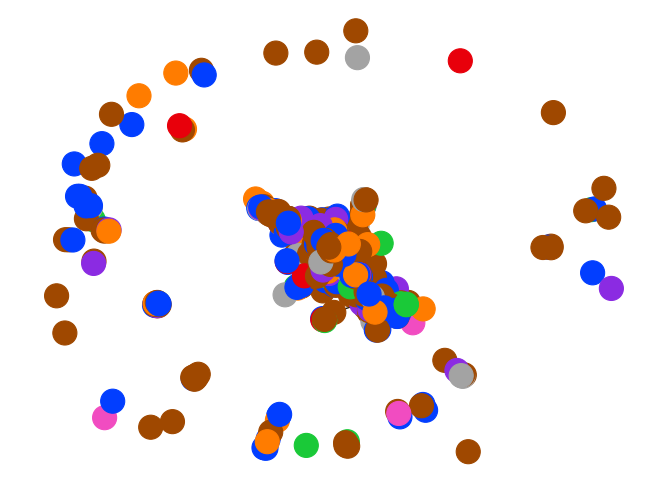

In [126]:
nx.draw(G_N, node_color=[palette[i] for i in coll])

In [76]:
import pandas as pd

In [84]:
names = pd.read_csv("./files.csv", header=None, names=["id", "group", "docid"])

In [91]:
col = names.group[[int(n) for n in topN]]

In [130]:
com = nx.community.louvain_communities(G0, seed=123)

com_sizes = [len(x) for x in com]

In [131]:
len(com)

74

In [133]:
max(com_sizes)

2750

In [132]:
com_sizes.index(max(com_sizes))

8

In [104]:
min([len(x) for x in com])

5

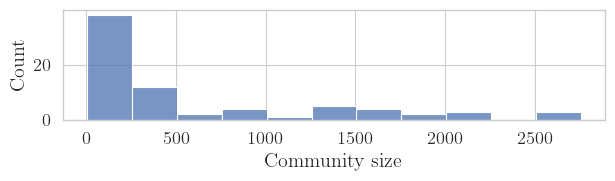

In [195]:
fig, ax = plt.subplots(figsize=(7,2))
sns.histplot([len(x) for x in com], binwidth=250, ax=ax)
plt.xlabel("Community size")
fig.subplots_adjust(bottom=0.33)
plt.savefig("figures/community_dist.pdf", **save_args)

<AxesSubplot: ylabel='Density'>

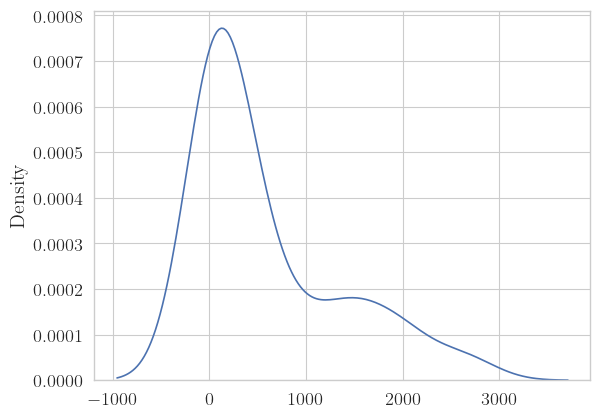

In [112]:
sns.kdeplot([len(x) for x in com])

In [118]:
coll = list(col)

In [121]:
communities = set(col)

In [122]:
col_map

{'astro-ph',
 'cond-mat',
 'cs',
 'hep-ph',
 'hep-th',
 'math',
 'physics',
 'quant-ph'}

In [211]:
palette = sns.color_palette(n_colors=len(communities))
palette = {c: palette[i] for i, c in enumerate(communities)}


[(0.6235294117647059, 0.2823529411764706, 0.0),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (1.0, 0.48627450980392156, 0.0),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (0.5450980392156862, 0.168627450

In [127]:
for community in com:
    print(community)

{'7805', '49150', '6895', '43848', '16276', '17783', '4663', '11098', '37189', '14063', '52524', '10537', '37731', '47819', '4025', '26919', '1422', '41261', '8654', '10442', '8303', '9558', '5281', '2890', '10608', '40374', '39881', '7063', '47713', '52932', '50643', '9819', '7346', '40272', '2211', '28108', '46849', '5040', '4236', '20323', '42569', '9131', '36559', '767', '52285', '12508', '29677', '3159', '2455', '11475', '38434', '4250', '2624', '12684', '16733', '37447', '8373', '10600', '22603', '10594', '28711', '17712', '33778', '11166', '9322', '9534', '4567', '49800', '1385', '51224', '9643', '30579', '37248', '17393', '26696', '22178', '12903', '2932', '11636', '2982', '15175', '3762', '47975', '45112', '4838', '11693', '35531', '46847', '1400', '5104', '23358', '44305', '48286', '37704', '52632', '15033', '45718', '53015', '49172', '9281', '40649', '2470', '7259', '1542', '4325', '9925', '10966', '50016', '10377', '8862', '8617', '13644', '44235', '7871', '6343', '50171', 

In [134]:
bigest_com = com[8]

2750

In [136]:
G_com = G0.subgraph(com[8])

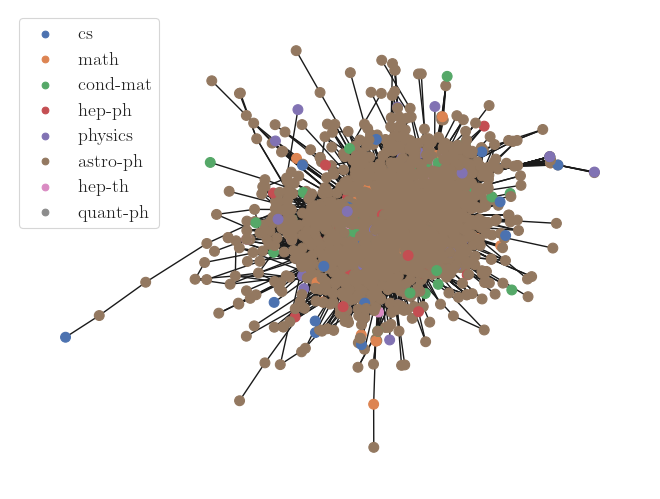

In [212]:
groups = names.group[[int(n) for n in com[8]]]

nx.draw(G_com, node_color=[palette[i] for i in groups], node_size=50)

for k, v in palette.items():
    plt.scatter([],[], c=[v], label=k)
plt.legend()

plt.savefig("figures/community.png", **save_args)

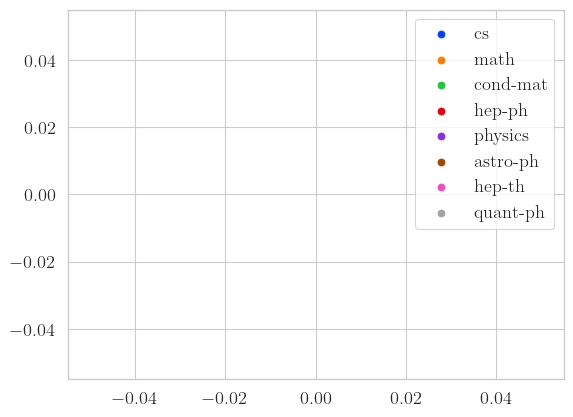

In [143]:
for k, v in palette.items():
    plt.scatter([],[], c=[v], label=k)
plt.legend()

1902


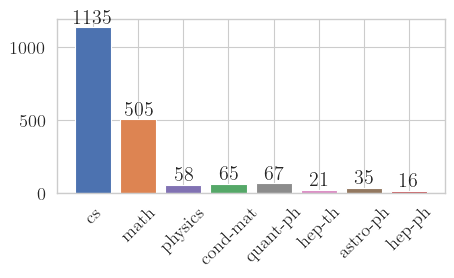

In [213]:
from collections import Counter

groups = names.group[[int(n) for n in com[40]]]
print(len(groups))
cnt = Counter(groups)
#fig, ax = plt.subplot()
#bars = ax.bar(cnt.keys(), cnt.values(), color=[palette[i] for i in cnt.keys()])

#ax.bar_label(bars)

fig, ax = plt.subplots(figsize=(5, 3))
bars = ax.bar(cnt.keys(), cnt.values(), color=[palette[i] for i in cnt.keys()])
plt.xticks(rotation = 45)
#ax.set_ylim(0,2900)
ax.bar_label(bars)
fig.subplots_adjust(bottom=0.3)
plt.savefig("figures/community_dist_cs.pdf", **save_args)

2750


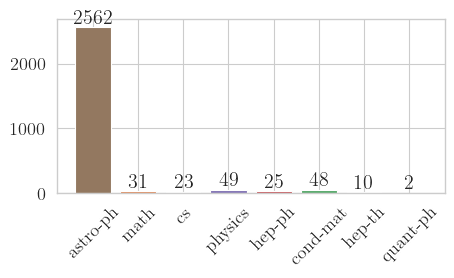

In [214]:
groups = names.group[[int(n) for n in com[8]]]
print(len(groups))
cnt = Counter(groups)
#fig, ax = plt.subplot()
#bars = ax.bar(cnt.keys(), cnt.values(), color=[palette[i] for i in cnt.keys()])

#ax.bar_label(bars)

fig, ax = plt.subplots(figsize=(5, 3))
bars = ax.bar(cnt.keys(), cnt.values(), color=[palette[i] for i in cnt.keys()])
plt.xticks(rotation = 45)
#ax.set_ylim(0,2900)
ax.bar_label(bars)
fig.subplots_adjust(bottom=0.3)
plt.savefig("figures/community_dist_biggest.pdf")

In [154]:
cnt

Counter({'astro-ph': 2562,
         'math': 31,
         'cs': 23,
         'physics': 49,
         'hep-ph': 25,
         'cond-mat': 48,
         'hep-th': 10,
         'quant-ph': 2})

In [138]:
palette

{'cs': (0.00784313725490196, 0.24313725490196078, 1.0),
 'math': (1.0, 0.48627450980392156, 0.0),
 'cond-mat': (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 'hep-ph': (0.9098039215686274, 0.0, 0.043137254901960784),
 'physics': (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 'astro-ph': (0.6235294117647059, 0.2823529411764706, 0.0),
 'hep-th': (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 'quant-ph': (0.6392156862745098, 0.6392156862745098, 0.6392156862745098)}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


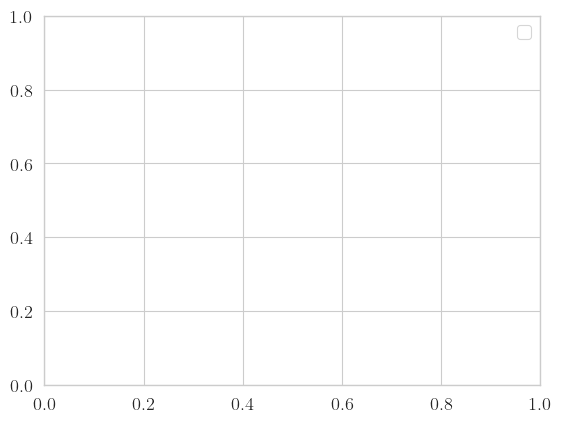

In [141]:
plt.legend()

In [196]:
topN

['2039',
 '10564',
 '40321',
 '188',
 '38592',
 '10648',
 '33539',
 '46059',
 '55479',
 '28723',
 '44710',
 '55091',
 '11660',
 '39519',
 '37135',
 '38729',
 '39320',
 '43488',
 '55664',
 '48428',
 '41238',
 '39207',
 '49195',
 '21145',
 '45106',
 '374',
 '7425',
 '17041',
 '52467',
 '4848',
 '16999',
 '52390',
 '33892',
 '55506',
 '7247',
 '22776',
 '13224',
 '40279',
 '53936',
 '55750',
 '38874',
 '1092',
 '41262',
 '49600',
 '1289',
 '2127',
 '49811',
 '23699',
 '42792',
 '7818',
 '1615',
 '2834',
 '30164',
 '86',
 '1433',
 '922',
 '21764',
 '24905',
 '46703',
 '54642',
 '42109',
 '8236',
 '50944',
 '497',
 '19442',
 '40998',
 '8128',
 '52005',
 '9789',
 '33783',
 '48455',
 '1316',
 '8542',
 '4216',
 '2542',
 '10519',
 '11760',
 '5037',
 '48878',
 '21318',
 '27815',
 '19087',
 '6038',
 '23256',
 '53933',
 '9966',
 '10114',
 '9987',
 '6368',
 '44249',
 '38649',
 '9255',
 '11296',
 '17362',
 '55467',
 '2331',
 '5182',
 '13408',
 '38784',
 '692',
 '41406',
 '1294',
 '3301',
 '132',
 '1

In [204]:
names.docid[2039]

2039

In [210]:
top10 = nlargest(10, pr, key = pr.get)
for n in top10:
    n = int(n)
    print(names.group[n], names.docid[n], pr[str(n)])

astro-ph 2039 0.0004730959491908196
astro-ph 10564 0.000345787025163168
math 270 0.00034277414726052946
astro-ph 188 0.00033910275231181363
hep-th 5 0.00033910275231181363
astro-ph 10648 0.00033449023721670673
cs 15444 0.0003290159538238295
math 6008 0.0003290159538238295
quant-ph 1595 0.0003290159538238295
cs 10628 0.00027116491548855054
